In [19]:
%pip install matplotlib

In [1]:
import pandas as pd
# Step 1: Load Dataset
df = pd.read_csv('amazon_products.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# df.head(5)
# 
# df.shape
# 
# df.dtypes
# 
# df.isna().sum()

In [2]:
print(df['price'].head())
print(df['sold_quantity'].head())

0    $169.99 
1      $9.87 
2    $169.99 
3      $9.87 
4     $41.99 
Name: price, dtype: object
0    20K+
1    10K+
2    20K+
3    10K+
4     NaN
Name: sold_quantity, dtype: object


In [3]:
import pandas as pd
import re
# Load your data
df = pd.read_csv('amazon_products.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Step 1: Clean product title
df['title'] = df['title'].fillna('')

# Step 2: Clean price and sold_quantity columns
def parse_price(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').replace('+', '').strip()
        if re.search(r'[a-zA-Z]', value):  # If any letter appears, skip it
            return None
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        try:
            return float(value)
        except ValueError:
            return None
    return value

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

for col in ['price', 'sold_quantity']:
    df[col] = df[col].apply(parse_price)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['price', 'rating', 'sold_quantity'])

# Scale numeric features
numeric_features = df[['price', 'rating', 'sold_quantity']]
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

# KMeans Clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(numeric_scaled)

# PCA for Dimensionality Reduction (for plotting)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_scaled)


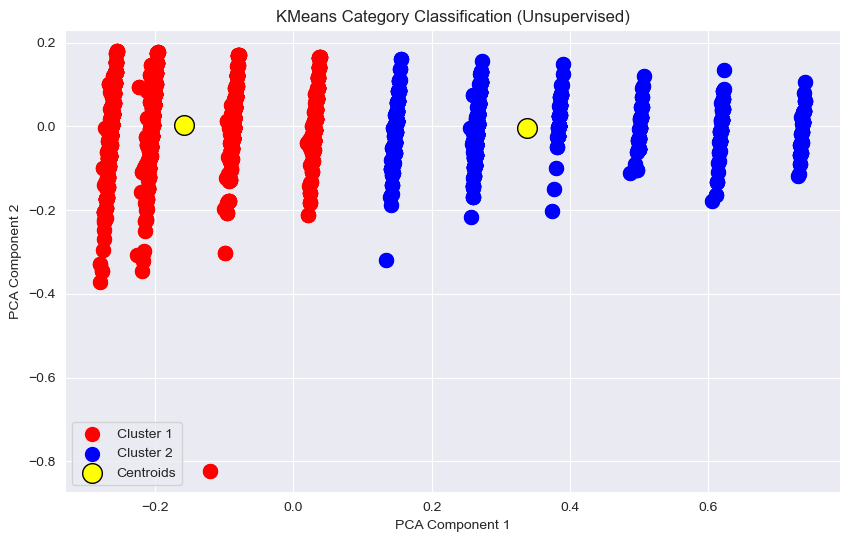

In [5]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'cyan','magenta','pink','orange']
for i in range(k):
    plt.scatter(pca_components[y_kmeans == i, 0], pca_components[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids (projected via PCA)
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            s=200, c='yellow', label='Centroids', edgecolors='black')

plt.title("KMeans Category Classification (Unsupervised)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score

In [57]:
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(numeric_scaled, y_kmeans)
calinski_harabasz = calinski_harabasz_score(numeric_scaled, y_kmeans)
davies_bouldin = davies_bouldin_score(numeric_scaled, y_kmeans)

In [58]:
print(f"Inertia (WCSS): {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Inertia (WCSS): 134.34
Silhouette Score: 0.59
Calinski-Harabasz Index: 9300.98
Davies-Bouldin Index: 0.61


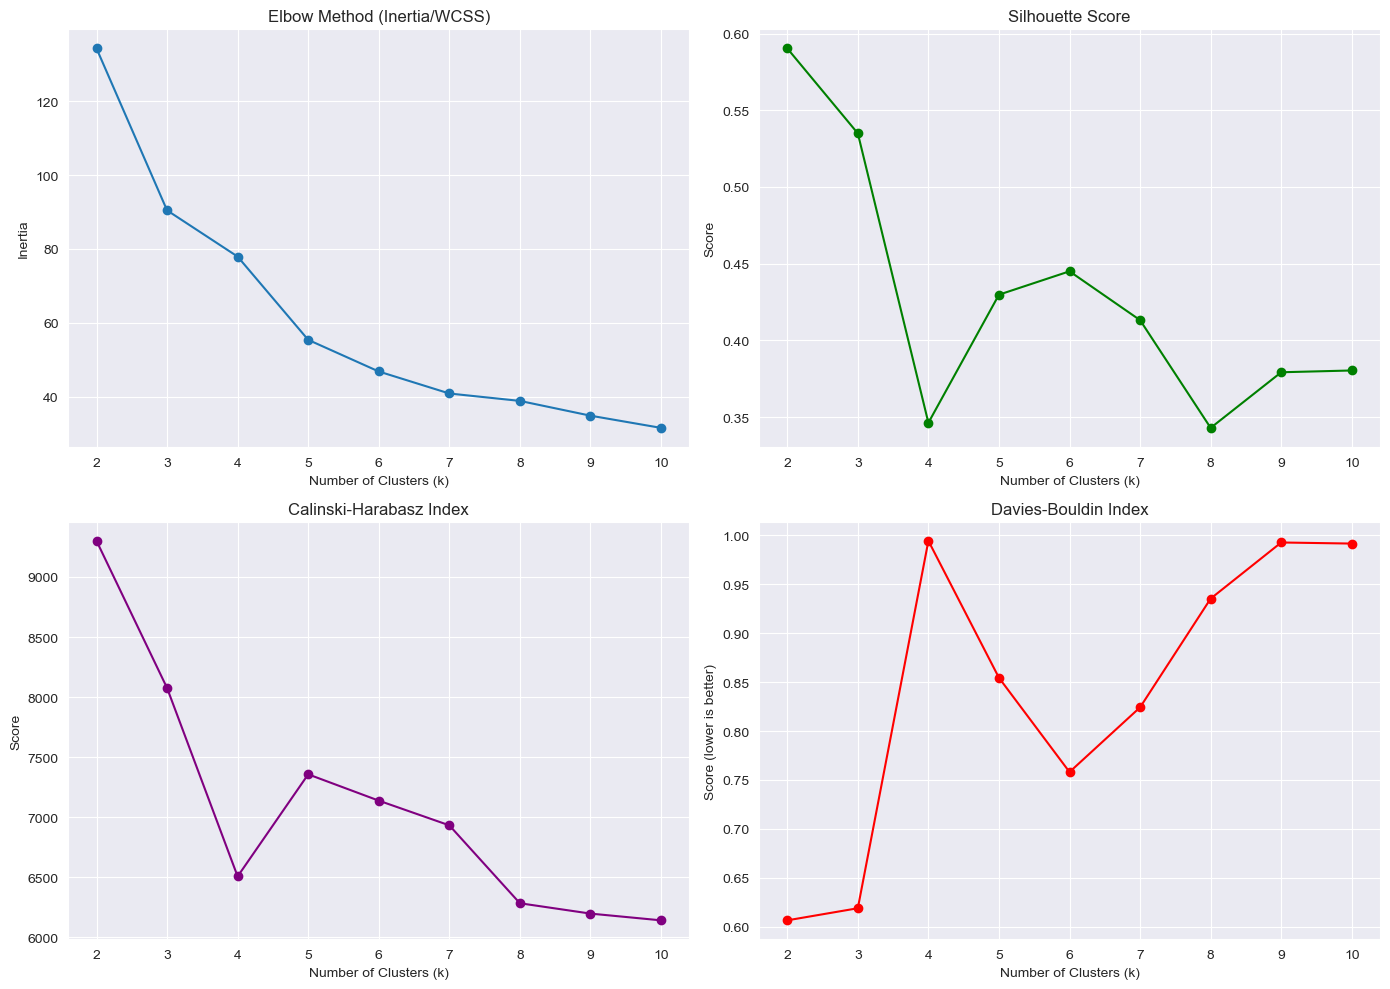

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

inertias = []
silhouettes = []
calinski_scores = []
davies_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(numeric_scaled)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(numeric_scaled, y_kmeans))
    calinski_scores.append(calinski_harabasz_score(numeric_scaled, y_kmeans))
    davies_scores.append(davies_bouldin_score(numeric_scaled, y_kmeans))

# Step 4: Plot Metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method (Inertia/WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(2, 2, 2)
plt.plot(K_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.subplot(2, 2, 3)
plt.plot(K_range, calinski_scores, marker='o', color='purple')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
plt.plot(K_range, davies_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score (lower is better)')

plt.tight_layout()
plt.show()

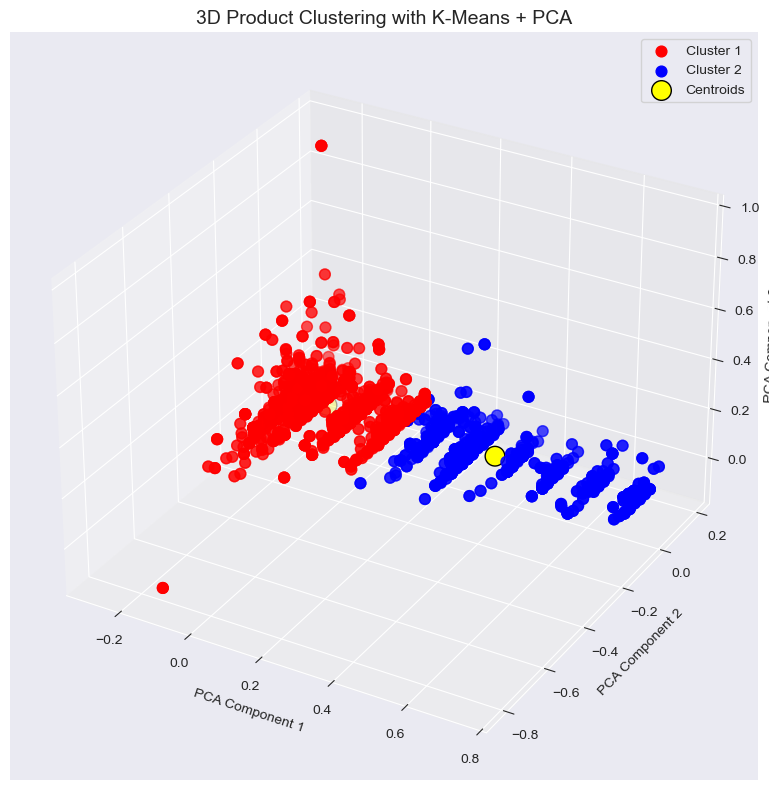

In [59]:
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA

# PCA 3D
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_scaled)
centroids_3d = pca.transform(kmeans.cluster_centers_)

# 3D Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan','magenta','pink','orange']
for i in range(k):
    ax.scatter(
        pca_components[y_kmeans == i, 0],
        pca_components[y_kmeans == i, 1],
        pca_components[y_kmeans == i, 2],
        s=60,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

# Plot centroids
ax.scatter(
    centroids_3d[:, 0],
    centroids_3d[:, 1],
    centroids_3d[:, 2],
    s=200,
    c='yellow',
    label='Centroids',
    edgecolors='black'
)

ax.set_title("3D Product Clustering with K-Means + PCA", fontsize=14)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.tight_layout()
plt.show()

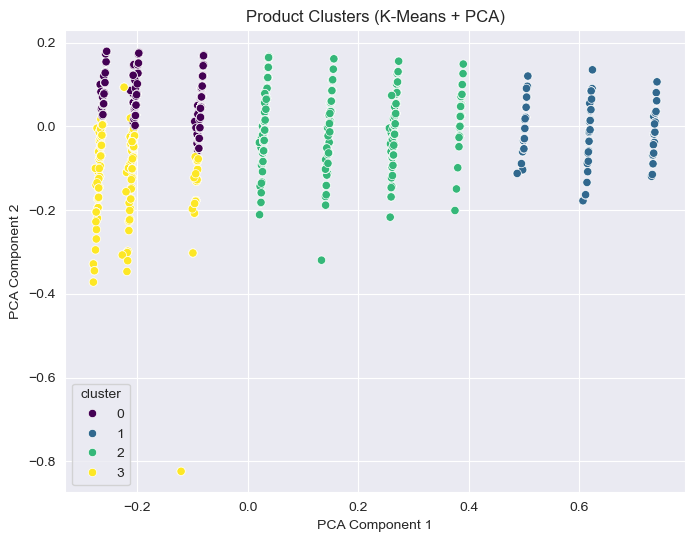

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# PCA for reducing to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Product Clusters (K-Means + PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [14]:
import os
import pandas as pd

folder_path = '../Search Based Filtering Personalized E-commerce Product Recommendation'  # Replace with your actual folder path
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
all_dataframes = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    if not df.empty and not df.dropna(axis=1, how='all').empty:
        all_dataframes.append(df)
    else:
        print(f"Skipped empty or all-NaN file: {file}")

if all_dataframes:
    merged_df = pd.concat(all_dataframes, ignore_index=True)
    merged_df.to_csv('merged_output.csv', index=False)
    print(f"Merged {len(all_dataframes)} files into 'merged_output.csv'")
else:
    print("No valid CSV files to merge.")


Skipped empty or all-NaN file: amazon_products Jeans.csv
Skipped empty or all-NaN file: amazon_products T-shirt.csv
Skipped empty or all-NaN file: amazon_products_Tablet.csv
Merged 26 files into 'merged_output.csv'
